# AR

In [2]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = Series.from_csv('.\daily-minimum-temperatures.csv', header=0)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

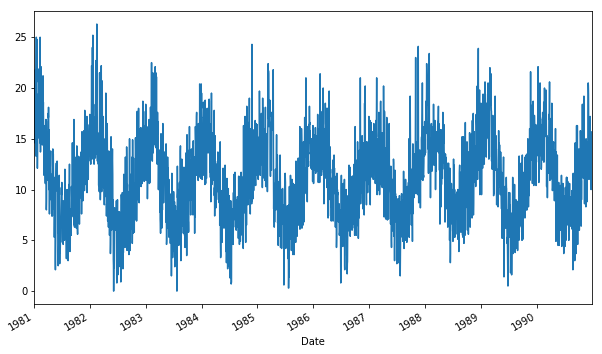

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


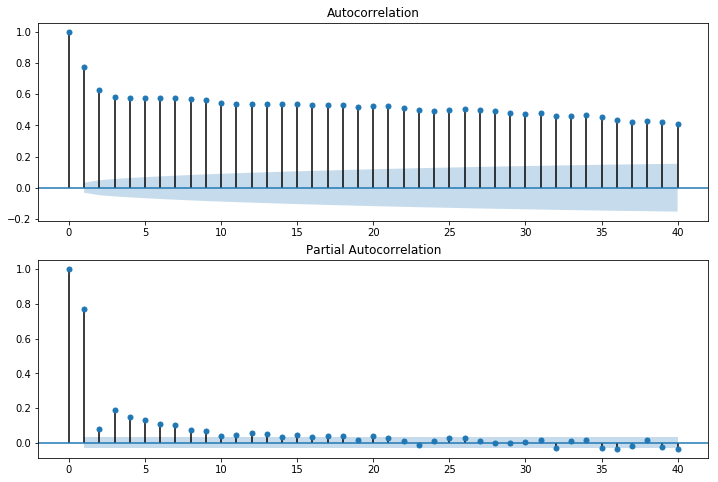

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Autoregression Model

In [6]:
from statsmodels.tsa.ar_model import AR

In [7]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [8]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


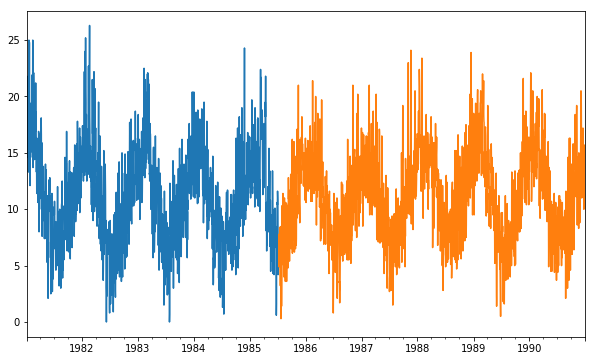

In [9]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
plt.show()

In [10]:
print(len(train))
print(len(test))

1646
2001


In [11]:
model = AR(train)

In [12]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [13]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [14]:
from sklearn.metrics import mean_squared_error
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=7.738295, expected=7.500000
predicted=7.747052, expected=4.900000
predicted=7.343110, expected=5.900000
predicted=7.097824, expected=7.800000
predicted=7.093936, expected=5.800000
predicted=7.389590, expected=7.000000
predicted=7.692920, expected=8.400000
predicted=7.955183, expected=6.200000
predicted=7.893243, expected=7.500000
predicted=7.960929, expected=4.800000
predicted=8.182984, expected=3.300000
predicted=8.281968, expected=3.200000
predicted=8.449309, expected=7.000000
predicted=8.281219, expected=8.400000
predicted=8.154464, expected=0.300000
predicted=8.055823, expected=0.300000
predicted=8.002211, expected=2.100000
predicted=8.031101, expected=8.500000
predicted=8.030902, expected=1.400000
predicted=8.078643, expected=4.100000
predicted=8.121020, expected=10.300000
predicted=8.144461, expected=6.600000
predicted=8.155071, expected=6.100000
predicted=8.157473, expected=7.000000
predicted=8.184450, expected=5.100000
predicted=8.220490, expected=6.300000
predicted=8

predicted=10.486826, expected=8.200000
predicted=10.486826, expected=8.400000
predicted=10.486826, expected=8.500000
predicted=10.486826, expected=10.400000
predicted=10.486826, expected=6.800000
predicted=10.486826, expected=6.000000
predicted=10.486826, expected=6.600000
predicted=10.486826, expected=7.800000
predicted=10.486826, expected=10.300000
predicted=10.486826, expected=7.200000
predicted=10.486826, expected=7.400000
predicted=10.486826, expected=11.400000
predicted=10.486826, expected=5.400000
predicted=10.486826, expected=4.400000
predicted=10.486826, expected=6.400000
predicted=10.486826, expected=9.300000
predicted=10.486826, expected=7.700000
predicted=10.486826, expected=8.100000
predicted=10.486826, expected=8.300000
predicted=10.486826, expected=9.100000
predicted=10.486826, expected=7.700000
predicted=10.486826, expected=10.600000
predicted=10.486826, expected=8.200000
predicted=10.486826, expected=7.900000
predicted=10.486826, expected=5.200000
predicted=10.486826, 

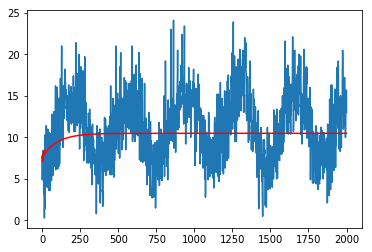

In [15]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# pandas

In [16]:
model = AR(trainS)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [17]:
model_fit = model.fit()

In [18]:
testS.index

DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')

In [19]:
predictions = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True)
predictions

1985-07-09     8.164979
1985-07-10     8.137249
1985-07-11     7.916977
1985-07-12     7.453769
1985-07-13     7.189459
1985-07-14     7.198919
1985-07-15     7.477094
1985-07-16     7.786770
1985-07-17     8.069249
1985-07-18     8.021870
1985-07-19     8.064157
1985-07-20     8.255817
1985-07-21     8.357122
1985-07-22     8.520817
1985-07-23     8.386297
1985-07-24     8.238178
1985-07-25     8.135671
1985-07-26     8.069439
1985-07-27     8.111722
1985-07-28     8.137661
1985-07-29     8.181042
1985-07-30     8.226856
1985-07-31     8.249380
1985-08-01     8.254479
1985-08-02     8.257864
1985-08-03     8.278814
1985-08-04     8.310957
1985-08-05     8.352570
1985-08-06     8.370820
1985-08-07     8.399684
                ...    
1990-12-01    10.486826
1990-12-02    10.486826
1990-12-03    10.486826
1990-12-04    10.486826
1990-12-05    10.486826
1990-12-06    10.486826
1990-12-07    10.486826
1990-12-08    10.486826
1990-12-09    10.486826
1990-12-10    10.486826
1990-12-11    10

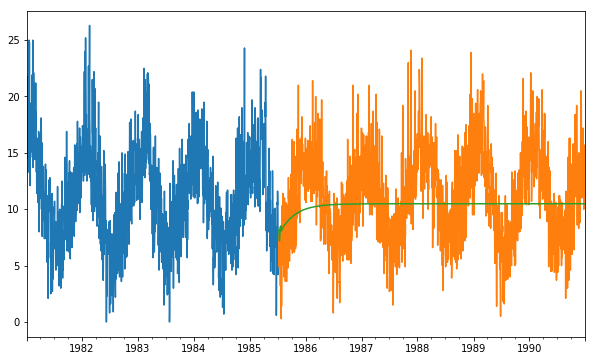

In [20]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
predictions.plot()
plt.show()

In [21]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7.738295, expected=7.500000
predicted=7.602570, expected=4.900000
predicted=5.641968, expected=5.900000
predicted=6.505617, expected=7.800000
predicted=7.452119, expected=5.800000
predicted=6.353841, expected=7.000000
predicted=7.446543, expected=8.400000
predicted=8.251573, expected=6.200000
predicted=6.598147, expected=7.500000
predicted=7.663741, expected=4.800000
predicted=6.029706, expected=3.300000
predicted=5.589981, expected=3.200000
predicted=5.500996, expected=7.000000
predicted=7.376267, expected=8.400000
predicted=7.602015, expected=0.300000
predicted=2.596745, expected=0.300000
predicted=3.532280, expected=2.100000
predicted=4.224756, expected=8.500000
predicted=7.508639, expected=1.400000
predicted=2.342885, expected=4.100000
predicted=5.498982, expected=10.300000
predicted=8.390430, expected=6.600000
predicted=5.725110, expected=6.100000
predicted=5.295464, expected=7.000000
predicted=6.747761, expected=5.100000
predicted=5.636402, expected=6.300000
predicted=6

predicted=13.023051, expected=13.600000
predicted=13.868671, expected=14.400000
predicted=13.952028, expected=11.800000
predicted=12.488546, expected=15.800000
predicted=15.077152, expected=16.000000
predicted=14.645945, expected=11.800000
predicted=12.055057, expected=14.500000
predicted=14.234560, expected=10.700000
predicted=11.817143, expected=14.200000
predicted=14.334745, expected=19.500000
predicted=16.734586, expected=21.400000
predicted=17.713789, expected=17.900000
predicted=15.613441, expected=17.400000
predicted=16.275393, expected=12.700000
predicted=13.271640, expected=13.800000
predicted=14.754422, expected=14.000000
predicted=14.292153, expected=15.000000
predicted=15.145712, expected=14.500000
predicted=14.774572, expected=13.100000
predicted=13.796476, expected=11.400000
predicted=12.529609, expected=12.500000
predicted=13.109237, expected=12.000000
predicted=12.893320, expected=13.400000
predicted=13.653095, expected=14.400000
predicted=14.113099, expected=17.700000


predicted=9.112034, expected=11.300000
predicted=10.375963, expected=11.300000
predicted=9.819235, expected=6.700000
predicted=7.427340, expected=6.600000
predicted=7.856020, expected=11.400000
predicted=10.699341, expected=6.900000
predicted=7.551179, expected=10.600000
predicted=10.391478, expected=8.600000
predicted=8.391898, expected=11.300000
predicted=10.522483, expected=12.500000
predicted=10.533848, expected=9.900000
predicted=9.238393, expected=6.900000
predicted=8.054016, expected=5.500000
predicted=7.739766, expected=7.800000
predicted=8.694044, expected=11.000000
predicted=10.276452, expected=16.200000
predicted=13.035084, expected=9.900000
predicted=8.719957, expected=8.700000
predicted=9.394538, expected=10.500000
predicted=10.130958, expected=12.200000
predicted=10.953270, expected=10.600000
predicted=9.718467, expected=8.300000
predicted=9.579036, expected=5.500000
predicted=7.857329, expected=9.000000
predicted=9.663247, expected=6.400000
predicted=7.376505, expected=7

predicted=11.447562, expected=7.800000
predicted=10.043212, expected=10.400000
predicted=11.526729, expected=10.400000
predicted=11.283679, expected=14.100000
predicted=13.634523, expected=7.100000
predicted=9.034875, expected=8.100000
predicted=10.164836, expected=7.800000
predicted=9.487714, expected=10.600000
predicted=11.114840, expected=9.100000
predicted=10.174967, expected=9.000000
predicted=10.565304, expected=11.900000
predicted=11.702239, expected=17.100000
predicted=13.993878, expected=16.800000
predicted=13.146537, expected=13.500000
predicted=12.123526, expected=11.600000
predicted=12.221948, expected=7.000000
predicted=9.667860, expected=9.700000
predicted=11.545915, expected=9.900000
predicted=10.520799, expected=11.200000
predicted=11.154860, expected=11.300000
predicted=10.859888, expected=11.800000
predicted=11.695264, expected=9.900000
predicted=10.218166, expected=7.100000
predicted=8.873971, expected=9.600000
predicted=10.161879, expected=9.800000
predicted=10.2834

predicted=11.689450, expected=13.400000
predicted=12.436872, expected=14.900000
predicted=13.099386, expected=15.200000
predicted=12.952953, expected=13.900000
predicted=12.899781, expected=15.000000
predicted=14.020827, expected=16.200000
predicted=14.729881, expected=17.700000
predicted=15.325581, expected=20.500000
predicted=16.866718, expected=14.700000
predicted=13.469828, expected=12.500000
predicted=13.070364, expected=10.900000
predicted=12.241542, expected=12.800000
predicted=13.278524, expected=12.700000
predicted=12.691844, expected=11.200000
predicted=11.945399, expected=11.400000
predicted=12.183744, expected=11.200000
predicted=11.981344, expected=12.100000
predicted=12.411379, expected=12.700000
predicted=12.667026, expected=16.200000
predicted=14.610337, expected=14.200000
predicted=13.168527, expected=14.300000
predicted=13.727327, expected=13.300000
predicted=13.166011, expected=16.700000
predicted=15.403566, expected=15.300000
predicted=14.124152, expected=14.300000


predicted=7.511529, expected=8.000000
predicted=8.341619, expected=8.300000
predicted=8.282562, expected=9.300000
predicted=8.925054, expected=9.500000
predicted=8.862545, expected=5.600000
predicted=6.528702, expected=7.000000
predicted=7.921160, expected=8.500000
predicted=8.587503, expected=8.500000
predicted=8.615400, expected=8.200000
predicted=8.504712, expected=8.500000
predicted=8.623281, expected=9.600000
predicted=9.132695, expected=9.700000
predicted=8.854962, expected=7.100000
predicted=7.236921, expected=8.400000
predicted=8.555713, expected=9.200000
predicted=9.097586, expected=9.800000
predicted=9.425401, expected=8.100000
predicted=8.295278, expected=9.400000
predicted=9.224102, expected=10.000000
predicted=9.452721, expected=5.100000
predicted=6.492258, expected=6.700000
predicted=8.024214, expected=6.900000
predicted=7.820248, expected=6.800000
predicted=7.572161, expected=8.600000
predicted=8.511484, expected=9.100000
predicted=8.597432, expected=3.900000
predicted=5

predicted=17.267001, expected=20.400000
predicted=18.124484, expected=22.000000
predicted=18.951234, expected=19.700000
predicted=17.695951, expected=19.600000
predicted=18.264666, expected=20.300000
predicted=18.873303, expected=18.300000
predicted=17.697116, expected=18.900000
predicted=18.317311, expected=20.300000
predicted=18.985127, expected=21.400000
predicted=19.421806, expected=18.300000
predicted=17.579209, expected=17.800000
predicted=17.686607, expected=17.700000
predicted=17.499841, expected=12.800000
predicted=14.885993, expected=15.100000
predicted=16.728940, expected=15.000000
predicted=16.047907, expected=14.800000
predicted=15.921101, expected=12.000000
predicted=14.108080, expected=12.500000
predicted=14.506848, expected=15.000000
predicted=15.570903, expected=17.100000
predicted=16.608946, expected=17.300000
predicted=16.508002, expected=16.900000
predicted=16.455043, expected=16.500000
predicted=16.199499, expected=13.600000
predicted=14.442695, expected=13.200000


predicted=7.105729, expected=9.500000
predicted=9.665707, expected=11.700000
predicted=10.430028, expected=9.200000
predicted=8.945076, expected=7.300000
predicted=8.074895, expected=9.700000
predicted=9.573473, expected=9.400000
predicted=9.060510, expected=10.000000
predicted=9.327346, expected=10.900000
predicted=10.023088, expected=11.000000
predicted=10.254633, expected=10.900000
predicted=10.120188, expected=8.000000
predicted=8.510545, expected=11.200000
predicted=10.509391, expected=7.500000
predicted=8.359059, expected=7.200000
predicted=8.461887, expected=13.200000
predicted=11.925219, expected=12.900000
predicted=11.019130, expected=9.400000
predicted=9.234806, expected=10.200000
predicted=10.063050, expected=9.500000
predicted=9.395087, expected=12.400000
predicted=11.250506, expected=10.200000
predicted=9.933998, expected=13.400000
predicted=12.410834, expected=11.600000
predicted=10.815425, expected=8.000000
predicted=8.904756, expected=9.000000
predicted=9.612648, expect

predicted=12.724928, expected=7.000000
predicted=9.658397, expected=4.900000
predicted=8.904917, expected=6.900000
predicted=9.843460, expected=13.700000
predicted=13.081164, expected=10.600000
predicted=10.537621, expected=12.300000
predicted=11.875837, expected=11.100000
predicted=10.910515, expected=10.200000
predicted=10.443101, expected=9.500000
predicted=10.188426, expected=8.900000
predicted=10.166313, expected=13.400000
predicted=12.604879, expected=9.100000
predicted=9.805654, expected=9.400000
predicted=10.308354, expected=8.700000
predicted=9.851216, expected=5.800000
predicted=8.106642, expected=4.500000
predicted=7.457272, expected=7.200000
predicted=8.799897, expected=10.000000
predicted=9.897574, expected=10.500000
predicted=9.917541, expected=10.700000
predicted=10.006811, expected=8.200000
predicted=8.659496, expected=6.100000
predicted=7.518517, expected=4.500000
predicted=7.146345, expected=6.100000
predicted=8.047935, expected=9.800000
predicted=10.005590, expected=

predicted=16.365167, expected=15.500000
predicted=14.517572, expected=14.100000
predicted=14.276420, expected=11.000000
predicted=12.674730, expected=11.100000
predicted=12.921543, expected=14.000000
predicted=14.414619, expected=11.400000
predicted=12.226687, expected=12.500000
predicted=12.883176, expected=13.400000
predicted=13.505004, expected=13.600000
predicted=13.352822, expected=13.900000
predicted=13.554801, expected=17.200000
predicted=15.620014, expected=14.700000
predicted=13.996339, expected=15.400000
predicted=14.883028, expected=13.100000
predicted=13.335332, expected=13.200000
predicted=13.741564, expected=13.900000
predicted=14.186322, expected=10.000000
predicted=11.901936, expected=12.900000
predicted=13.665105, expected=14.600000
predicted=14.368689, expected=14.000000
predicted=13.455963, expected=13.600000
predicted=13.377656, expected=13.500000
predicted=13.463123, expected=15.700000
predicted=14.730852, expected=13.000000


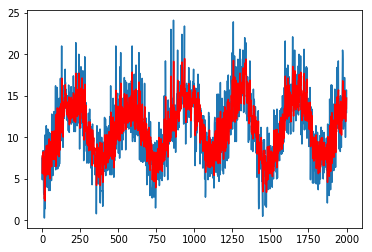

In [22]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

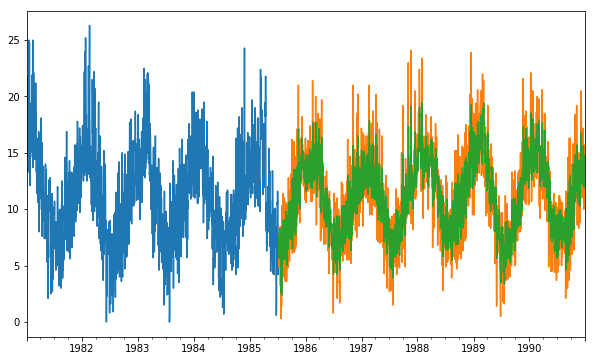

In [23]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.loc['1950':].plot()
testS.plot()
pre.plot()
plt.show()

predicted=7.738295, expected=7.500000
predicted=7.604087, expected=4.900000
predicted=5.659902, expected=5.900000
predicted=6.511230, expected=7.800000
predicted=7.445662, expected=5.800000
predicted=6.361309, expected=7.000000
predicted=7.444866, expected=8.400000
predicted=8.243610, expected=6.200000
predicted=6.603307, expected=7.500000
predicted=7.657376, expected=4.800000
predicted=6.036691, expected=3.300000
predicted=5.601762, expected=3.200000
predicted=5.531487, expected=7.000000
predicted=7.393171, expected=8.400000
predicted=7.607208, expected=0.300000
predicted=2.628348, expected=0.300000
predicted=3.563671, expected=2.100000
predicted=4.261306, expected=8.500000
predicted=7.517336, expected=1.400000
predicted=2.405120, expected=4.100000
predicted=5.544736, expected=10.300000
predicted=8.433630, expected=6.600000
predicted=5.786903, expected=6.100000
predicted=5.325826, expected=7.000000
predicted=6.738679, expected=5.100000
predicted=5.691595, expected=6.300000
predicted=6

predicted=11.788703, expected=12.600000
predicted=12.831135, expected=14.700000
predicted=14.261718, expected=11.100000
predicted=11.083875, expected=10.100000
predicted=10.953628, expected=11.400000
predicted=11.364857, expected=13.000000
predicted=12.883222, expected=11.900000
predicted=11.886986, expected=9.500000
predicted=10.817498, expected=13.500000
predicted=13.010027, expected=15.200000
predicted=13.400119, expected=18.400000
predicted=15.410313, expected=24.100000
predicted=19.110750, expected=14.100000
predicted=13.151486, expected=10.700000
predicted=12.392258, expected=8.700000
predicted=11.046896, expected=13.300000
predicted=13.871925, expected=11.600000
predicted=11.987651, expected=9.900000
predicted=11.759306, expected=10.800000
predicted=12.259799, expected=11.500000
predicted=12.159203, expected=10.000000
predicted=10.145936, expected=13.900000
predicted=13.105126, expected=13.600000
predicted=12.663175, expected=11.900000
predicted=12.107856, expected=11.100000
pre

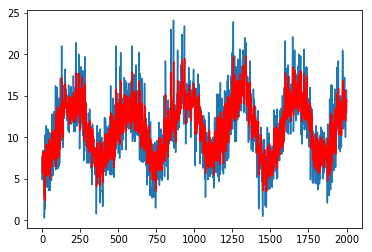

In [24]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

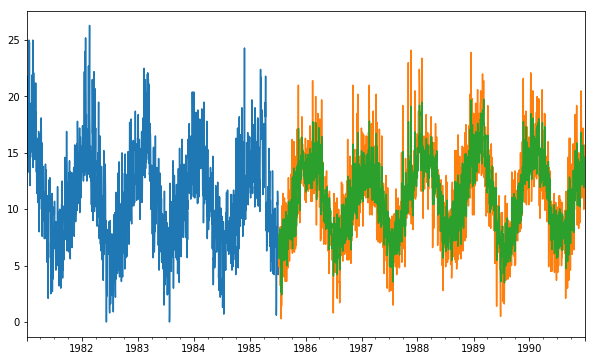

In [25]:
pre=pd.Series(predictions, index=testS.index)

plt.figure(figsize=(10,6));
trainS.loc['1950':].plot()
testS.plot()
pre.plot()
plt.show()

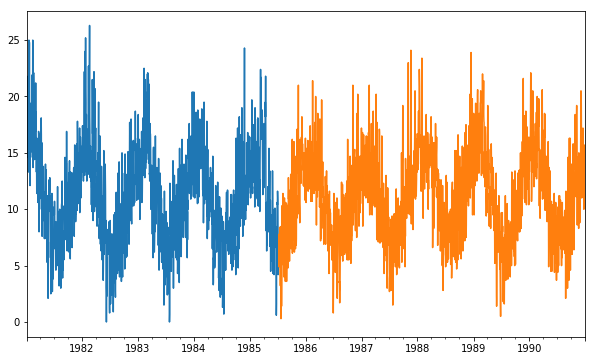

In [26]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

Test RMSE: 2.439


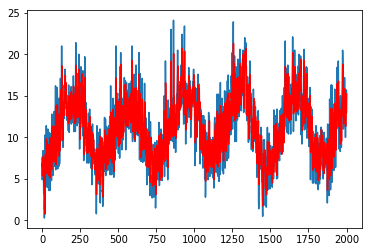

In [29]:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
model = ARIMA(history, order=(4,1,0))
model_fit = model.fit()
# one step forecast
yhat = model_fit.forecast()[0]

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in train]
#(start='1985-07-09',end='1990-12-30', dynamic=True)
history
model = ARIMA(trainS, order=(4,2,0))
model_fit = model.fit()
model_fit.forecast()[0]

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([7.07322181])

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


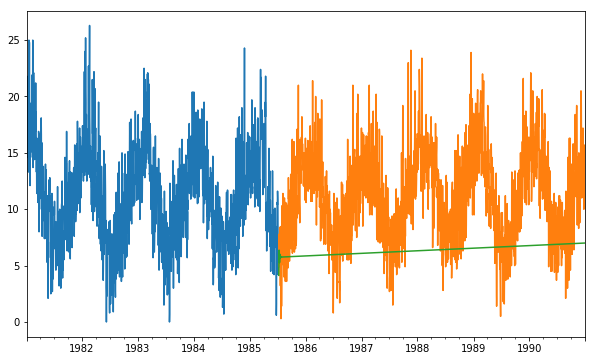

In [33]:
predictions1 = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
# predictionsS.plot()
predictions1.plot()
plt.show()

https://stats.stackexchange.com/questions/229948/plotting-predicted-values-in-arima-time-series-in-r

In [ ]:
model_fit.forecast(len(predictions1))[0]

In [ ]:
model_fit.forecast(len(predictions1))[1]

In [ ]:
model_fit.forecast(len(predictions1))[2]

In [ ]:
fig, ax = plt.subplots()
ax = trainS.loc['1980':].plot()
fig = model_fit.plot_predict('1985-07-09','1986-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()